In [1]:
from alpaca.uvmodels.model_library import QED_DFSZ, beta
from alpaca.experimental_data.measurements_exp import babar_Y3S_inv, babar_Y3S_mumu
from alpaca.statistics.chisquared import chi2_obs, combine_chi2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'text.usetex': True, 'font.family': 'serif', 'font.serif': 'Computer Modern Roman'})

In [2]:
ma = np.logspace(-2, 1, 80)
couplings = [QED_DFSZ.get_couplings({beta: np.pi/4}, fa).match_run(10, 'VA_below', integrator='leadinglog', matching_scale=80) for fa in np.logspace(2, 5, 20)]

In [3]:
x_ma, y_fa = np.meshgrid(ma, np.logspace(2, 5, 20))
x_ma, y_invfa = np.meshgrid(ma, 1/np.logspace(2, 5, 20))
x_ma, y_couplings = np.meshgrid(ma, couplings)

In [4]:
chi2_inv = chi2_obs(babar_Y3S_inv, 'Y(3S) -> gamma a', x_ma, y_couplings, y_fa, integrator='no_rge', theta=np.pi/2)
chi2_mumu = chi2_obs(babar_Y3S_mumu, 'Y(3S) -> gamma mu mu', x_ma, y_couplings, y_fa, integrator='no_rge', theta=np.pi/2)

/home/geonosis/Documents/alpaca/alp-aca/alpaca/statistics/chisquared.py:13: RuntimeWarning: invalid value encountered in divide
  return (meausrement.get_central(ma, ctau) - prob_decay*br)**2/(meausrement.get_sigma_left(ma, ctau)+meausrement.get_sigma_right(ma, ctau))**2
/home/geonosis/Documents/alpaca/alp-aca/alpaca/statistics/chisquared.py:13: RuntimeWarning: invalid value encountered in divide
  return (meausrement.get_central(ma, ctau) - prob_decay*br)**2/(meausrement.get_sigma_left(ma, ctau)+meausrement.get_sigma_right(ma, ctau))**2


In [5]:
chi2_tot = combine_chi2(chi2_inv, chi2_mumu)

/home/geonosis/Documents/alpaca/alp-aca/alpaca/statistics/chisquared.py:17: RuntimeWarning: invalid value encountered in divide
  return np.where(ndof == 0, np.nan, sum(np.nan_to_num(m) for m in chi2))/ndof


Text(0.25, 0.003, '$\\Upsilon(3S)\\to \\gamma \\mu^+\\mu^-$')

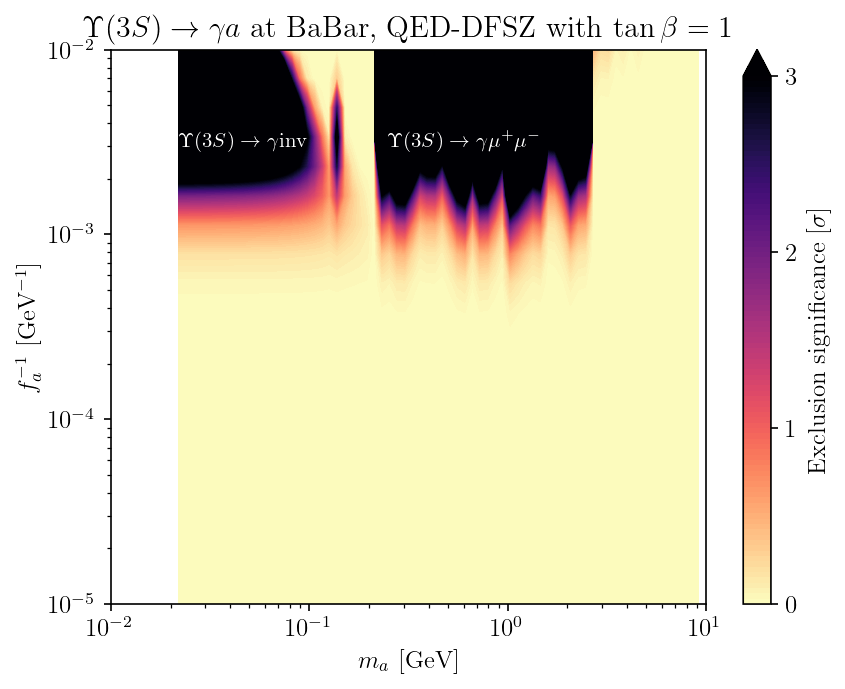

In [6]:
from alpaca.statistics.functions import nsigmas

plt.figure(dpi=150)
p1=plt.contourf(x_ma, y_invfa, nsigmas(np.real(chi2_tot),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
#plt.contour(x_ma, y_invfa, nsigmas(chi2_mumu,2), levels=[2], colors='r')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
cb = plt.colorbar(p1,extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks(np.linspace(0, 3, 4))
plt.title(r'$\Upsilon(3S)\to \gamma a$ at BaBar, QED-DFSZ with $\tan\beta=1$')
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.annotate(r'$\Upsilon(3S)\to \gamma \mathrm{inv}$', xy=(2.2e-2, 3e-3), color='w', fontsize=10)
plt.annotate(r'$\Upsilon(3S)\to \gamma \mu^+\mu^-$', xy=(2.5e-1, 3e-3), color='w', fontsize=10)